# LOAD MNIST DATA

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#read file
d0 = pd.read_csv('./dataset/train.csv')

In [5]:
d0.head(5) # print header (first five rows)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
l =d0['label'] # store labels in variable l

In [7]:
d = d0.drop("label",axis=1) #drop label column from dataset

In [8]:
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


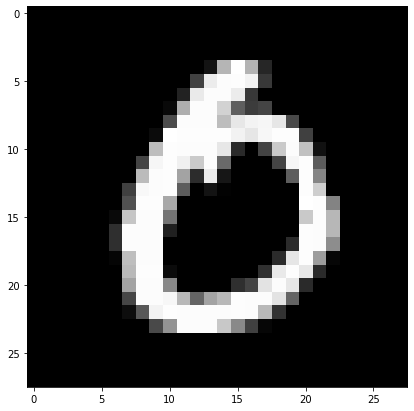

In [9]:
#display data
plt.figure(figsize=(7,7))
idx=200
grid_data = np.array(d.iloc[idx]).reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray' )

plt.show()

In [10]:
l[idx]

0

In [11]:
#2D Visualization using PCA

In [13]:
labels = l.head(15000)
data = d.head(15000)

In [18]:
data.shape

(15000, 784)

In [26]:
# here we are standardizing the data i.e each datapoint is substracted from its mean and then divided by std
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [28]:
# find the co variance matrix : A^T * A
sample_data = standardized_data

#matrix multiplication
covar_matrix = np.matmul(sample_data.T, sample_data)
covar_matrix.shape

(784, 784)

In [29]:
# findong the top two eigen values and 2 eigen vectors for projecting onto a 2-D space
#eigen values are in ascending order
from scipy.linalg import eigh

In [30]:
values,vectors = eigh(covar_matrix,eigvals=(782,783))

In [32]:
vectors= vectors.T

In [34]:
vectors.shape

(2, 784)

In [35]:
# projecting the original data sample on the plane formed by two eigen vectors
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors,sample_data.T)
# resulting new data points shape will be (2,784) X (784,15000) = (2,15000)

In [36]:
import pandas as pd
#appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates,labels)).T

In [37]:
#creating a new dataframe for ploting the labeled points
dataframe = pd.DataFrame(data=new_coordinates,columns=('1st_principal','2nd_principal','label'))

In [38]:
dataframe

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0
...,...,...,...
14995,3.139416,-4.758956,1.0
14996,1.946714,-1.314215,4.0
14997,-2.147937,-1.507269,8.0
14998,3.204122,-6.537313,9.0


D:\Programs\anaconda3\envs\web_scrap\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


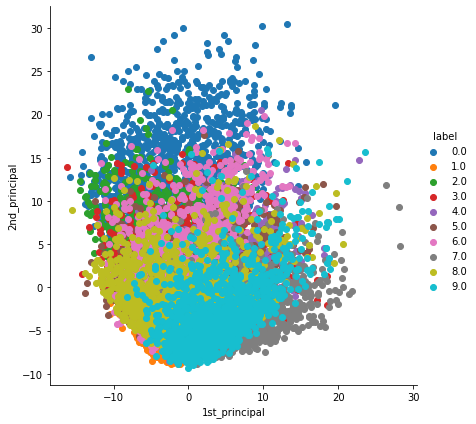

In [42]:
# plotting data using seaborn
import seaborn as sn
sn.FacetGrid(dataframe,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()


In [43]:
# PCA using Scikit-Learn
from sklearn import decomposition
pca = decomposition.PCA()

In [44]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

In [45]:
pca_data.shape

(15000, 2)

In [46]:
pca_data = np.vstack((pca_data.T,labels)).T #attaching labels for each 2-d datapoint


In [50]:
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','labels'))

D:\Programs\anaconda3\envs\web_scrap\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


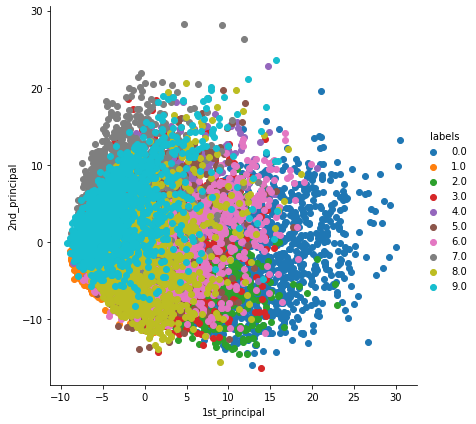

In [52]:
sn.FacetGrid(pca_df,hue='labels',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()